In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bankdataset/bank.csv


In [3]:
from __future__ import print_function
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.keras.utils.np_utils import to_categorical
import category_encoders
from calendar import month_abbr
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.utils import shuffle
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [4]:
data = pd.read_csv('../input/bankdataset/bank.csv')

In [5]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [6]:
data.shape

(11162, 17)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


- 10 out 17 are object variables === need for encoding

In [8]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

- No null data no need for filling 

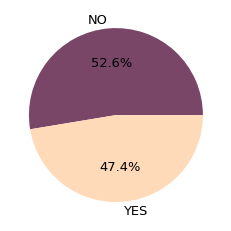

In [9]:
plot1= plt.pie(data.groupby('deposit')['deposit'].count(),labels=['NO','YES'],
              colors= ['#794668','#ffdab9'], autopct='%1.1f%%', textprops={'fontsize':13})

- We have a balencedd data no need for balencing 

In [10]:
# Exploring data and undrestanding features 

1 - age (numeric)

2 - job : type of job (categorical: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services")

3 - marital : marital status (categorical: "married", "divorced", "single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown", "secondary", "primary", "tertiary")

5 - default: has credit in default? (binary: "yes", "no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (binary: "yes", "no")

8 - loan: has personal loan? (binary: "yes", "no")

related with the last contact of the current campaign:
9 - contact: contact communication type (categorical: "unknown", "telephone", "cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

other attributes:
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):

17 - deposit - has the client subscribed a term deposit? (binary: "yes","no")



In [11]:
data['deposit'] = data['deposit'].map({'no': 0, 'yes': 1})

In [12]:
def visGraphMax(col, target):
    sns.displot(data=data, x=col, hue= target)
    #df=data.loc[(data[target]== 1)]
    #max1=df[col].value_counts().idxmax()
    #print("Max of "+col+" is "+max1)

In [13]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

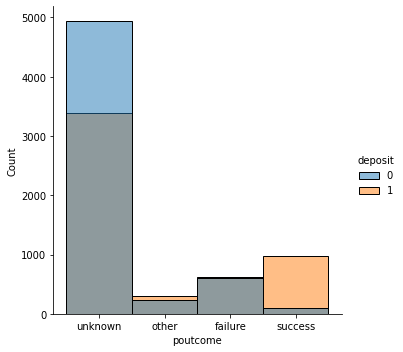

In [14]:
visGraphMax('poutcome', 'deposit')

If the outcome of the previous marketing campaign :
- is success tend to be sure that will get the client
- is other more chance to get the client 
- is failure there is more chance to not get it
- is unknown 3/5 will not get the client 


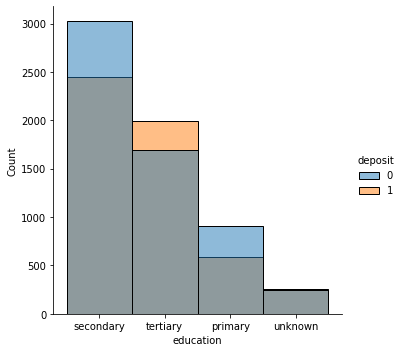

In [15]:
visGraphMax('education', 'deposit')

- Most cases of education tends to not be a client except tertiary 

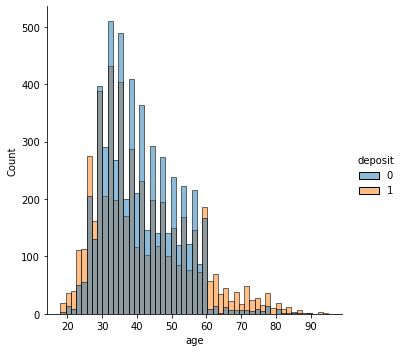

In [16]:
visGraphMax('age', 'deposit')

- More clients under 30 and over 55 yo
- category between 30-50 are not intrested 

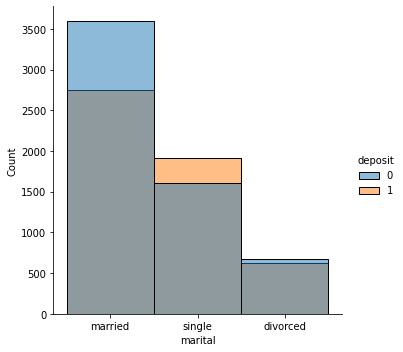

In [17]:
visGraphMax('marital', 'deposit')

- Single personnes tend to get a deposit more than divorced which are more than married

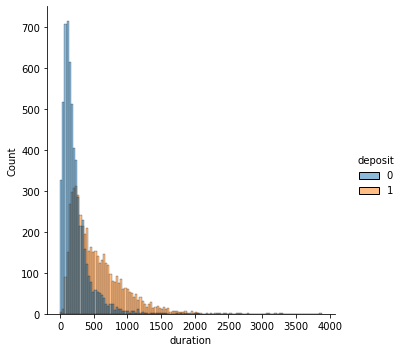

In [18]:
visGraphMax('duration', 'deposit')

- if the agent feals to keep the suspected client more than 2.5 secondes we will lose the client more than 3 secs it's possible to get the client 5 secs its perfect

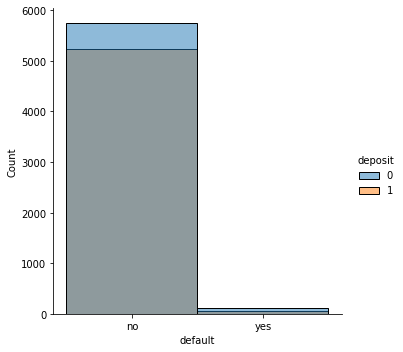

In [19]:
visGraphMax('default', 'deposit')

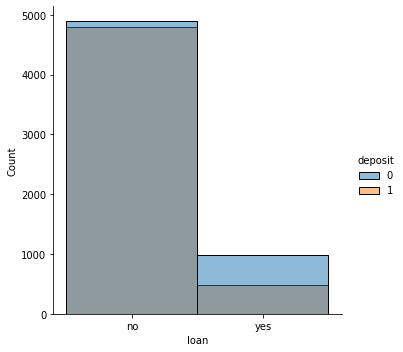

In [20]:
visGraphMax('loan', 'deposit')

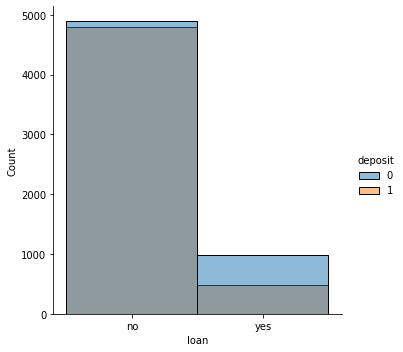

In [21]:
visGraphMax('loan', 'deposit')

- It doesn't seem this 2 features has that importance 

# Encoding data

In [22]:
def transformFeatures (data):  
    data['day'] = data['day'].astype(int)
    data['education'] = data['education'].map({'secondary': 3, 'tertiary': 1, 'unknown':2,'primary':4})
    data['poutcome'] = data['poutcome'].map({'success': 1, 'other': 2, 'failure':3,'unknown':4})
    lower_ma = [m.lower() for m in month_abbr]
    # one-liner with Pandas
    data['month'] = data['month'].str.lower().map(lambda m: lower_ma.index(m)).astype('Int8')
    # Duration transformation
    data.loc[data['duration'] < 983.6, 'duration'] = 0
    data.loc[(data['duration'] > 983.6) & (data['duration'] < 1967.2), 'duration'] = 1
    data.loc[(data['duration'] > 1967.2) & (data['duration'] < 2950.8), 'duration'] = 2
    data.loc[(data['duration'] > 2950.8) & (data['duration'] < 3934.4), 'duration'] = 3
    data.loc[data['duration'] > 3934.4, 'duration'] = 4
    #Age transformation
    data.loc[data['age'] <= 28.5, 'age'] = 1
    data.loc[(data['age'] > 28.5) & (data['age'] <= 58.5), 'age'] = 2
    data.loc[data['age'] >58.5, 'age'] = 3
    # Balance transformation
    data.loc[data['balance'] < 2995.6, 'balance'] = 0
    data.loc[(data['balance'] > 2995.6) & (data['balance'] < 14010.2), 'balance'] = 1
    data.loc[(data['balance'] > 14010.2) & (data['balance'] < 25024.8), 'balance'] = 2
    data.loc[(data['balance'] > 25024.8) & (data['balance'] < 36039.4), 'balance'] = 3
    data.loc[(data['balance'] > 36039.4) & (data['balance'] < 47054), 'balance'] = 4
    data.loc[(data['balance'] > 47054) & (data['balance'] < 58068.6), 'balance'] = 5
    data.loc[(data['balance'] > 58068.6) & (data['balance'] < 69083.2), 'balance'] = 6
    data.loc[(data['balance'] > 69083.2) & (data['balance'] < 80097.8), 'balance'] = 7
    data.loc[(data['balance'] > 80097.8) & (data['balance'] < 91112.4), 'balance'] = 8
    data.loc[data['balance'] > 91112.4, 'balance'] = 9
    # campaign
    data.loc[data['campaign'] < 11.3, 'campaign'] = 0
    data.loc[(data['campaign'] > 11.3) & (data['campaign'] < 21.6), 'campaign'] = 1
    data.loc[(data['campaign'] > 21.6) & (data['campaign'] <= 32), 'campaign'] = 2
    data.loc[(data['campaign'] > 32) & (data['campaign'] < 42.3), 'campaign'] = 3
    data.loc[(data['campaign'] > 42.3) & (data['campaign'] < 52.6), 'campaign'] = 4
    data.loc[data['campaign'] > 52.6, 'campaign'] = 5
    #previous
    data.loc[data['previous'] < 9.6, 'previous'] = 0
    data.loc[(data['previous'] > 9.6) & (data['previous'] < 19.3), 'previous'] = 1
    data.loc[(data['previous'] > 19.3) & (data['previous'] <= 29), 'previous'] = 2
    data.loc[(data['previous'] > 29) & (data['previous'] < 38.6), 'previous'] = 3
    data.loc[(data['previous'] > 38.6) & (data['previous'] < 48.3), 'previous'] = 4
    data.loc[data['previous'] > 48.3, 'previous'] = 5
    data['prevCamp']= data['campaign']+data['previous']
    data['ddMMS']= data['day']*100+ data['month']*10+data['duration']
    
    
    
   

In [23]:
def transformDPL (data):
    data['day'] = data['day'].astype(int)
    data['education'] = data['education'].map({'secondary': 3, 'tertiary': 1, 'unknown':2,'primary':4})
    data['poutcome'] = data['poutcome'].map({'success': 1, 'other': 2, 'failure':3,'unknown':4})
    lower_ma = [m.lower() for m in month_abbr]
    # one-liner with Pandas
    data['month'] = data['month'].str.lower().map(lambda m: lower_ma.index(m)).astype('Int8')
    # Duration transformation

In [24]:
def transforDDMMS (data):
    data.loc[data['ddMMS'] <=500, 'ddMMS'] = 0
    data.loc[(data['ddMMS'] > 500) & (data['ddMMS'] <= 1000), 'ddMMS'] = 1
    data.loc[(data['ddMMS'] > 1000) & (data['ddMMS'] <= 1500 ), 'ddMMS'] = 2
    data.loc[(data['ddMMS'] > 1500) & (data['ddMMS'] <= 2000), 'ddMMS'] = 3
    data.loc[(data['ddMMS'] > 2000) & (data['ddMMS'] < 2500), 'ddMMS']= 4

In [25]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1


In [26]:
def normalize (df):
    features= df.columns
    for column in features:
        mu = df[column].mean()
        sigma = df[column].std()
        df[column] = (df[column] - mu)/sigma

In [27]:
target =data.deposit
data.drop(columns='deposit', inplace=True)

In [28]:
encoder = LabelEncoder()

target = encoder.fit_transform(target)
target

array([1, 1, 1, ..., 0, 0, 0])

In [29]:
# shuffling data
#data= shuffle(data)

In [30]:
X_train, X_test, Y_train, Y_test= train_test_split(data, target, test_size=0.30, random_state=123)

In [31]:
X_trainDl= X_train.copy()
X_testDl= X_test.copy()

In [32]:
X_trainDl.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
9097,30,technician,married,secondary,no,207,yes,no,unknown,23,may,72,2,-1,0,unknown
9999,35,entrepreneur,married,secondary,no,1163,yes,no,unknown,20,may,284,1,-1,0,unknown
9300,60,retired,married,secondary,no,2060,no,no,cellular,26,mar,454,1,88,3,other
2886,34,management,married,tertiary,no,1778,no,no,cellular,4,nov,358,1,162,2,failure
5691,38,services,married,secondary,no,173,yes,no,unknown,20,may,130,2,-1,0,unknown


In [33]:
transformFeatures (X_train)
transformFeatures (X_test)
transformDPL(X_trainDl)
transformDPL (X_testDl)
#transforDDMMS (X_train)
#transforDDMMS (X_test)


In [34]:
def label_encode_columns(df, cols):
    encoders = {}
    for col in cols:
        le = LabelEncoder().fit(df[col])
        df[col] = le.transform(df[col])
        encoders[col] = le
    return df, encoders

#Create the function to take in the fitted encoders and transform the scoring dataset
def label_encode_columns_w_fit_encoders(df, cols, encoders):
    for col in cols:
        le = encoders.get(col)
        df[col] = le.transform(df[col])
    return df
 
#Define the columns we want to encode
encode_columns = ['job', 'marital', 'default', 'housing', 'loan', 'contact']
 
#Fit and transform the training dataset, returing both the new training dataset and the fitted encoders to use on the scoring dataset
X_train, encoders = label_encode_columns(X_train, encode_columns)
 
#Transform the scoring dataset using the encoders we fit previously
X_test = label_encode_columns_w_fit_encoders(X_test, encode_columns, encoders)

X_trainDl, encoders = label_encode_columns(X_trainDl, encode_columns)
 
#Transform the scoring dataset using the encoders we fit previously
X_testDl = label_encode_columns_w_fit_encoders(X_testDl, encode_columns, encoders)


In [35]:
#transformFeatures (data)
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,prevCamp,ddMMS
9097,2,9,1,3,0,0,1,0,2,23,5,0,0,-1,0,4,0,2350
9999,2,2,1,3,0,0,1,0,2,20,5,0,0,-1,0,4,0,2050
9300,3,5,1,3,0,0,0,0,0,26,3,0,0,88,0,2,0,2630
2886,2,4,1,1,0,0,0,0,0,4,11,0,0,162,0,3,0,510
5691,2,7,1,3,0,0,1,0,2,20,5,0,0,-1,0,4,0,2050


In [36]:
X_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,prevCamp,ddMMS
293,2,4,0,1,0,0,0,1,2,12,6,1,0,-1,0,4,0,1261
8185,2,0,1,3,0,0,1,0,2,16,5,0,0,-1,0,4,0,1650
253,2,1,1,3,0,0,1,0,2,5,6,0,0,-1,0,4,0,560
1350,2,4,2,1,0,1,0,0,0,12,3,1,0,-1,0,4,0,1231
9657,2,1,1,3,0,0,1,0,2,30,5,0,0,-1,0,4,0,3050


In [37]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,prevCamp,ddMMS
9097,2,9,1,3,0,0,1,0,2,23,5,0,0,-1,0,4,0,2350
9999,2,2,1,3,0,0,1,0,2,20,5,0,0,-1,0,4,0,2050
9300,3,5,1,3,0,0,0,0,0,26,3,0,0,88,0,2,0,2630
2886,2,4,1,1,0,0,0,0,0,4,11,0,0,162,0,3,0,510
5691,2,7,1,3,0,0,1,0,2,20,5,0,0,-1,0,4,0,2050


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score


from xgboost.sklearn import XGBClassifier
from sklearn import metrics
import xgboost as xgb

In [39]:
#normalize (X_train)
#normalize (X_test)

In [40]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
score = 100*accuracy_score(Y_test, y_pred)
score

68.79665571812481

In [41]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_test)
score = 100*accuracy_score(Y_test, y_pred)
score

74.499850701702

In [42]:
gboost = GradientBoostingClassifier()
gboost.fit(X_train, Y_train)
y_pred = gboost.predict(X_test)
score = 100*accuracy_score(Y_test, y_pred)
score

76.53030755449389

In [43]:
import keras
from keras.models import Sequential   # importing Sequential model
from keras.layers import Dense 


In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_trainDl)
X_train = scaler.transform(X_trainDl)
X_test = scaler.transform(X_testDl)  

In [45]:
X_trainDl=np.asarray(X_trainDl).astype(np.int)

Y_train=np.asarray(Y_train).astype(np.int)
X_testDl=np.asarray(X_testDl).astype(np.int)

Y_test=np.asarray(Y_test).astype(np.int)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the releas

In [46]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(16,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
	keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=10)
history = model.fit(X_trainDl,
                    Y_train,
                    epochs=30,
                    batch_size=3,
                    validation_data=(X_testDl, Y_test),
                    callbacks=[es],
                   )


2022-10-10 00:06:41.998148: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-10-10 00:06:42.417025: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
2605/2605 [==============================] - 7s 2ms/step - loss: 7.9314 - accuracy: 0.6507 - val_loss: 27.4174 - val_accuracy: 0.5231
Epoch 2/30
2605/2605 [==============================] - 6s 2ms/step - loss: 3.3758 - accuracy: 0.6777 - val_loss: 3.9230 - val_accuracy: 0.5336
Epoch 3/30
2605/2605 [==============================] - 6s 2ms/step - loss: 2.5238 - accuracy: 0.7006 - val_loss: 1.0602 - val_accuracy: 0.7468
Epoch 4/30
2605/2605 [==============================] - 7s 2ms/step - loss: 1.6934 - accuracy: 0.7179 - val_loss: 1.1898 - val_accuracy: 0.7125
Epoch 5/30
2605/2605 [==============================] - 6s 2ms/step - loss: 1.4801 - accuracy: 0.7150 - val_loss: 0.6373 - val_accuracy: 0.7519
Epoch 6/30
2605/2605 [==============================] - 7s 2ms/step - loss: 1.0963 - accuracy: 0.7214 - val_loss: 0.6759 - val_accuracy: 0.7522
Epoch 7/30
2605/2605 [==============================] - 6s 2ms/step - loss: 0.7152 - accuracy: 0.7400 - val_loss: 0.5951 - val_accuracy

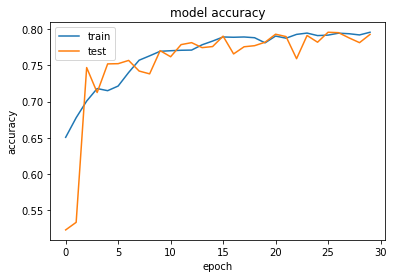

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<AxesSubplot:>

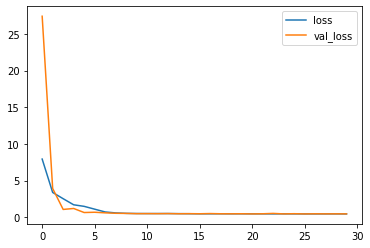

In [48]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()